# Cáncer de mama - Wisconsin Dataset

### Librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

### Cargando datos

#### Diccionario de datos

1. radius (mean of distances from center to points on the perimeter)
1. texture (standard deviation of gray-scale values)
1. perimeter
1. area
1. smoothness (local variation in radius lengths)
1. compactness (perimeter^2 / area - 1.0)
1. concavity (severity of concave portions of the contour)
1. concave points (number of concave portions of the contour)
1. symmetry
1. fractal dimension ("coastline approximation" - 1)

Diagnosis (0 = malignant, 1 = benign)

Más información en: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [348]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
predictors = cancer_df.columns[0:10]
cancer_df['target'] = cancer.target
cancer_df[predictors].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [349]:
cancer_df[predictors].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


### Análisis univariante

In [351]:
cancer_df[predictors].size

5690

In [352]:
# Missing values
cancer_df[predictors].columns[cancer_df[predictors].isnull().any()]

Index([], dtype='object')

In [353]:
# Describe
cancer_df[predictors].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


### Análisis multivariante

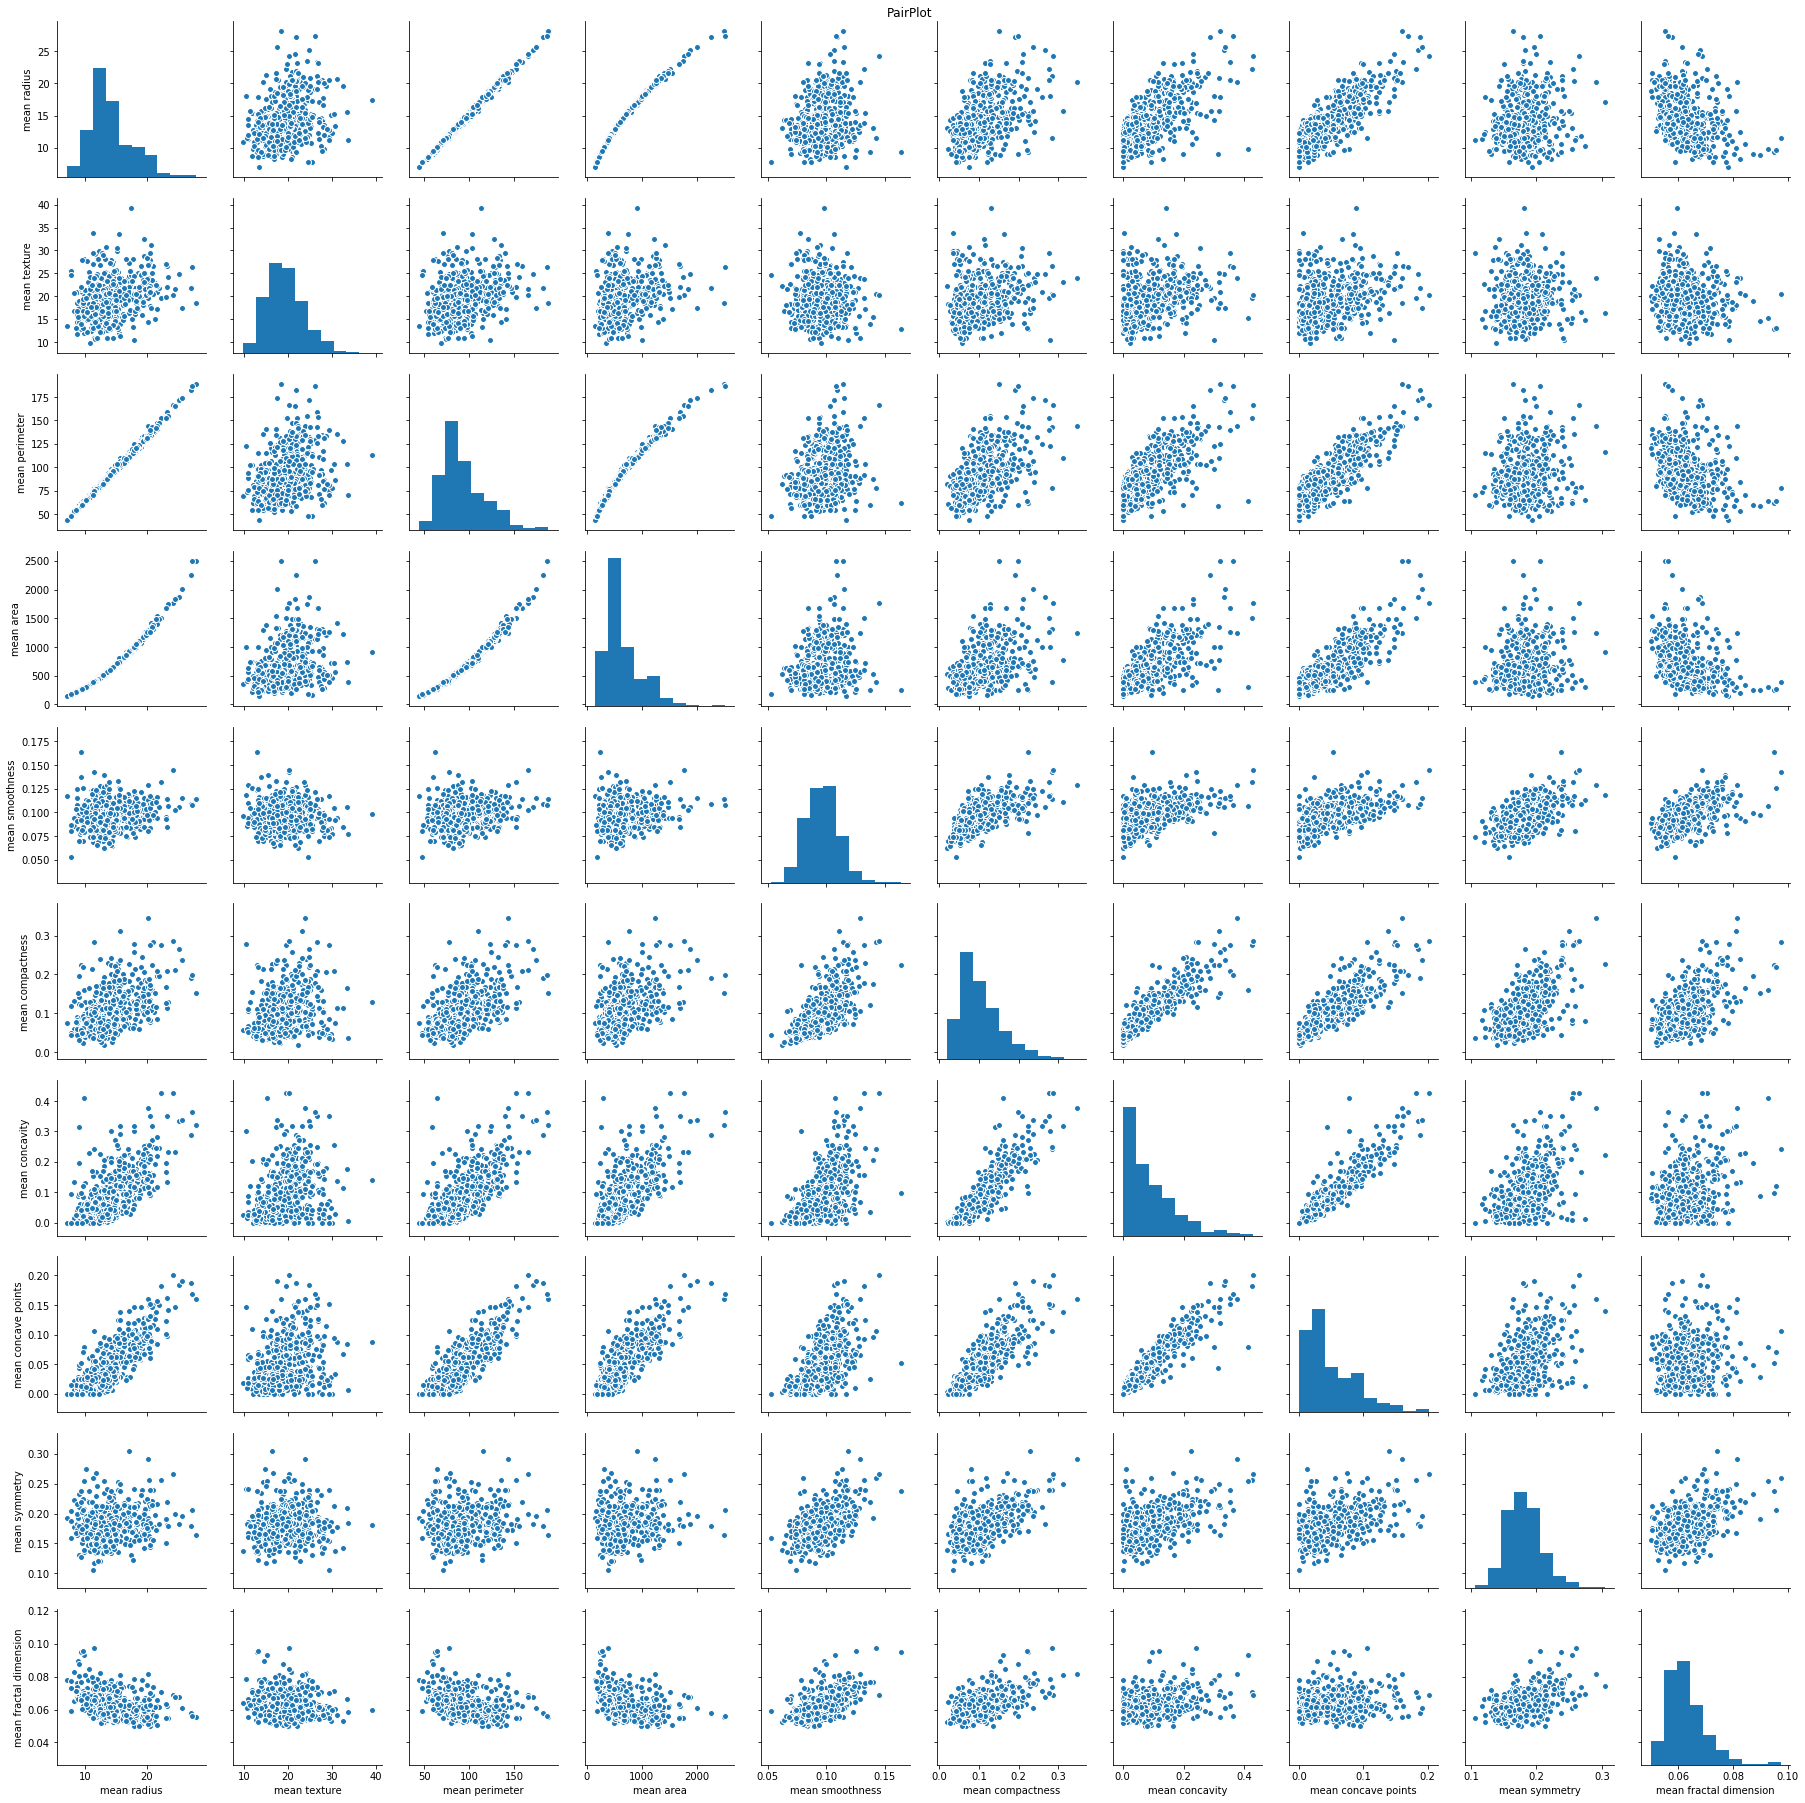

In [437]:
g = sns.pairplot(cancer_df[predictors])
g.fig.suptitle("PairPlot", y=1);

#### Histógramas por clase

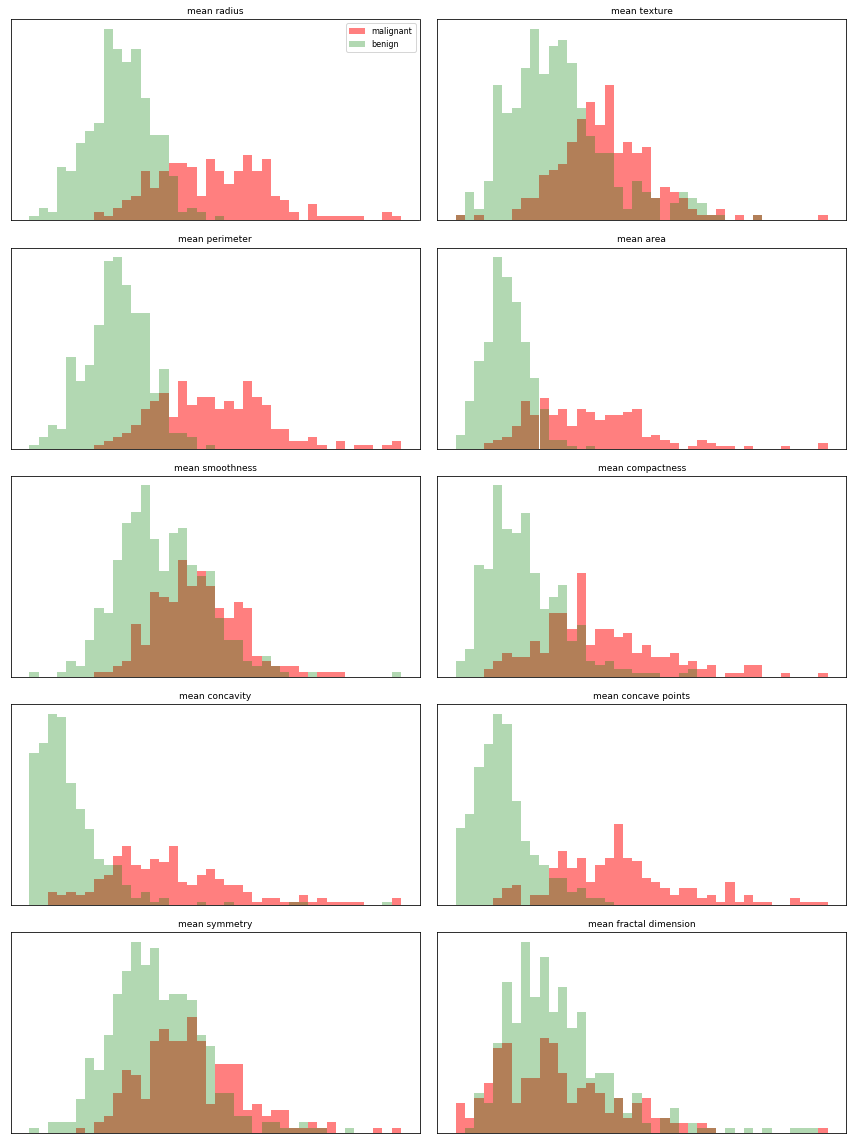

In [355]:
fig,axes =plt.subplots(5,2, figsize=(12, 16))
malignant=cancer_df[cancer_df.target==0] # define malignant
benign=cancer_df[cancer_df.target==1] # define benign
ax=axes.ravel() # flat axes with numpy ravel
for i in range(cancer_df[predictors].shape[1]):
  _,bins=np.histogram(cancer_df.iloc[:,i],bins=40)
  ax[i].hist(malignant.iloc[:,i],bins=bins,color='r',alpha=.5)
  ax[i].hist(benign.iloc[:,i],bins=bins,color='g',alpha=0.3)
  ax[i].set_title(cancer_df.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False) 
  ax[i].set_yticks(())
ax[0].legend(cancer.target_names,loc='best',fontsize=8)
plt.tight_layout()
plt.show()

#### Correlacion

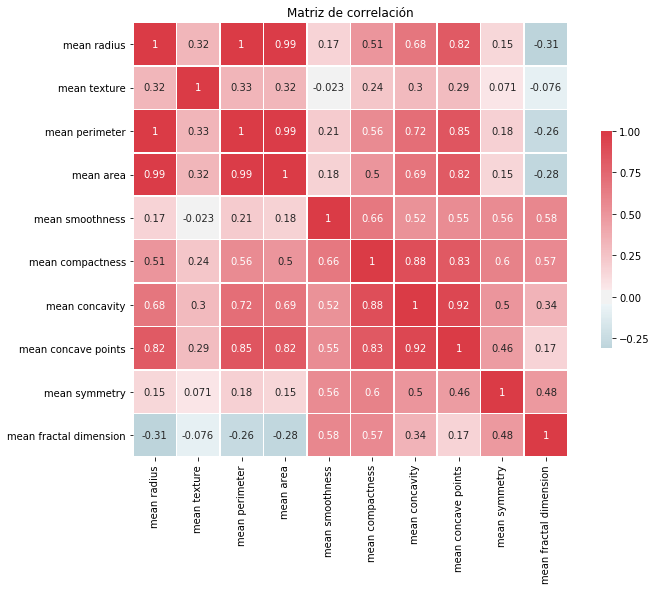

In [356]:
corr = cancer_df[predictors].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.subplots(figsize=(12,8))
plt.title("Matriz de correlación")
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

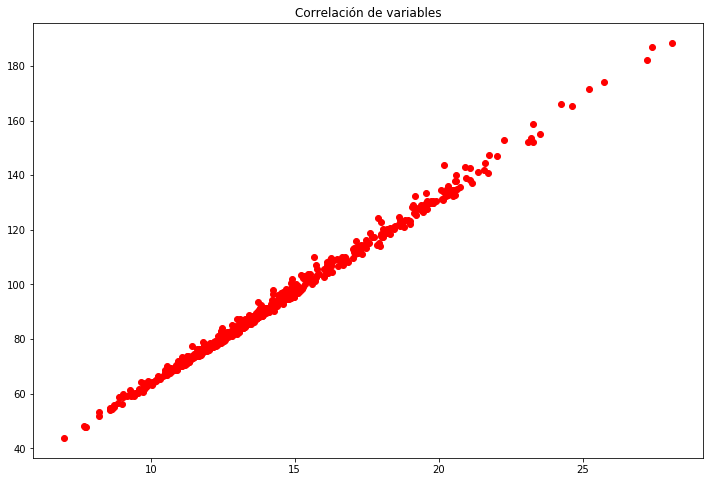

In [495]:
plt.subplots(figsize=(12,8))

plt.title("Correlación de variables")
plt.scatter(cancer_df['mean radius'], cancer_df['mean perimeter'], c="red")
plt.show()

In [474]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0, 1])
scaler.fit(cancer_df)
data = scaler.transform(cancer_df)
data = pd.DataFrame(data, columns=cancer_df.columns)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,0.0
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,0.0
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,0.0
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,0.0


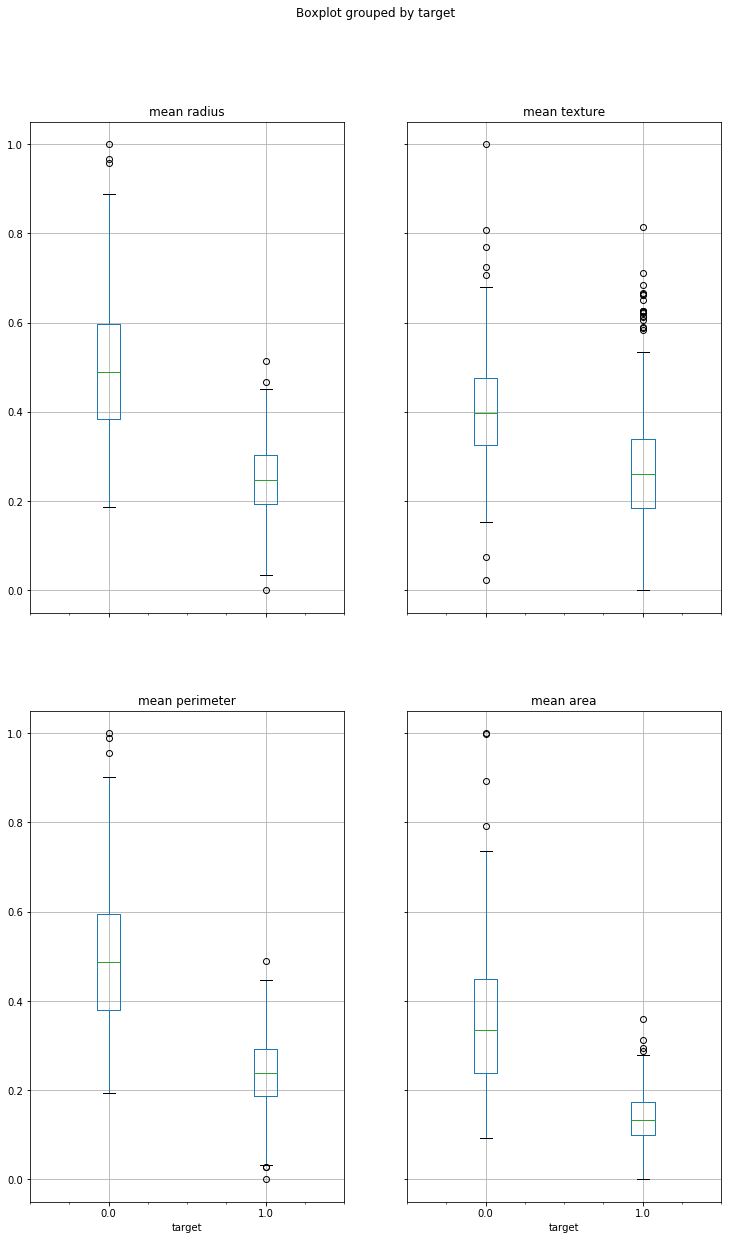

In [489]:
data.boxplot(column=predictors.values.tolist()[0:4],
             by='target', figsize=(12,20));

### Reducción de dimensionalidad

#### Escalado

In [462]:
scaler.fit(cancer_df[predictors])
X_scaled=scaler.transform(cancer_df[predictors])

#### PCA

In [359]:
from sklearn.decomposition import PCA
pca = PCA(random_state=1212).fit(X_scaled)
X_pca = pca.transform(X_scaled)

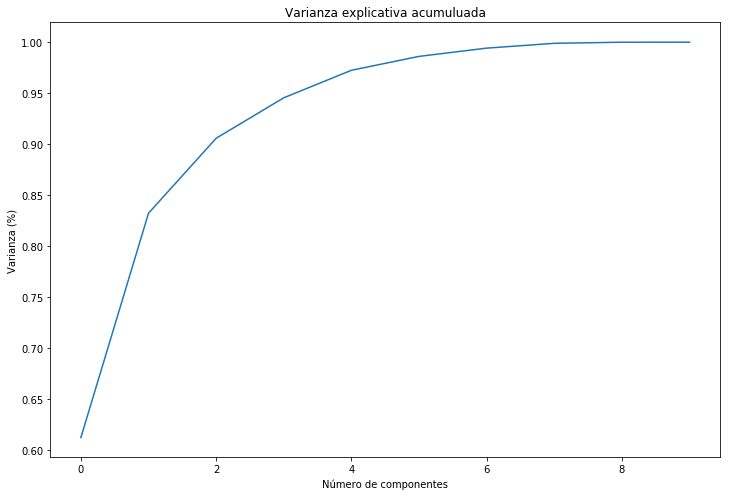

In [360]:
plt.subplots(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza (%)')
plt.title('Varianza explicativa acumuluada')
plt.show()

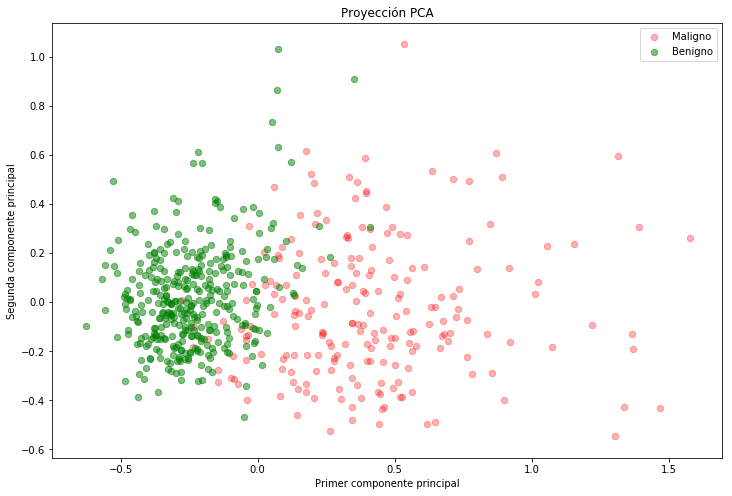

In [361]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=cancer.target
cdict={0:'red',1:'green'}
labl={0:'Maligno',1:'Benigno'}
marker={0:'o',1:'o'}
alpha={0:.3, 1:.5}

fig,ax=plt.subplots(figsize=(12,8))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix], Yax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l], alpha=alpha[l])

plt.title("Proyección PCA")
plt.xlabel("Primer componente principal")
plt.ylabel("Segunda componente principal")
plt.legend()
plt.show()

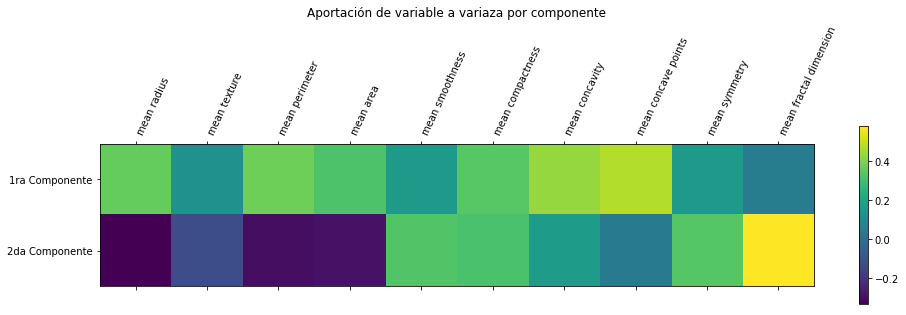

In [362]:
plt.matshow(pca.components_[0:2],cmap='viridis')
plt.yticks([0,1], ['1ra Componente','2da Componente'], fontsize=10)
plt.xticks(range(len(predictors)), predictors, rotation=65, ha='left')
plt.title("Aportación de variable a variaza por componente",fontsize=12,
          loc="center", pad=120)
plt.colorbar()
plt.show()

### Clustering (K-means)

In [493]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=2, max_iter=300, n_jobs=-1, random_state=1212)
clusters.fit(cancer_df[predictors])

centroids = clusters.cluster_centers_
labels = clusters.labels_

Porcentaje de observaciones que coinciden: 83.83%


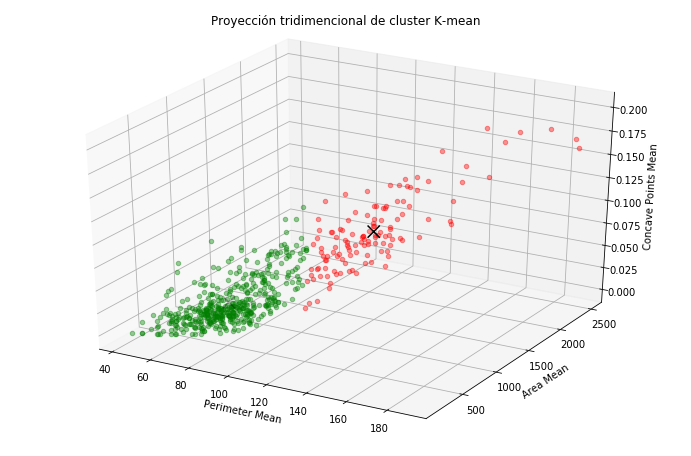

In [494]:
fig = plt.figure(figsize=(12,8))
# Add 3rd dimension to figure
ax = fig.add_subplot(111, projection='3d')
# This means "red" and "blue"
colors = ["r", "g"]

# Plot all the features and assign color based on cluster identity label
for i in range(len(features)):
    ax.scatter(xs=features[i][2], ys=features[i][3], zs=features[i][7],
               c=colors[labels[i]], zdir='z', alpha=.4)

# Plot centroids, though you can't really see them.
ax.scatter(xs=centroids[:,2], ys=centroids[:,3], zs=centroids[:,7],
           marker="x", s=150, c="black")

# Create array of diagnosis data, which should be same length as labels.
diag = np.array(cancer_df['target'])
# Create variable to hold matches in order to get percentage accuracy.
matches = 0

# Transform diagnosis vector
for i in range(0, len(diag)):
    if diag[i] == labels[i]:
        matches = matches + 1

#Calculate percentage matches and print.
percentMatch = np.round((matches/len(diag))*100, 2)
print(f"Porcentaje de observaciones que coinciden: {percentMatch}%")

#Set labels on figure and show 3D scatter plot to visualize data and clusters.
ax.set_xlabel("Perimeter Mean")
ax.set_ylabel("Area Mean")
ax.set_zlabel("Concave Points Mean")
plt.title("Proyección tridimencional de cluster K-mean", pad=20)
plt.show()